In [53]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.stats as stats
from scipy.stats import f_oneway


In [54]:
df_timeseries = pd.read_csv('data/df_timeseries.csv')
df_ict_access = pd.read_csv('data/ICT_usage.csv')

### Create a proper dataset for ICT access and cluster countries according to their average ICT access

In [8]:
display(df_ict_access)

,COU,Country,INDIC,Indicator,BRKD,Breakdowns,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,C5A,Individuals using the Internet - last 12 m (%),IND_TOTAL,All (individuals aged 16-74),2005,2005,PC,Percentage,0,Units,NaN,NaN,70.0000,D,Difference in methodology
1,AUS,Australia,C5A,Individuals using the Internet - last 12 m (%),IND_TOTAL,All (individuals aged 16-74),2006,2006,PC,Percentage,0,Units,NaN,NaN,73.0000,D,Difference in methodology
2,AUS,Australia,C5A,Individuals using the Internet - last 12 m (%),IND_TOTAL,All (individuals aged 16-74),2007,2007,PC,Percentage,0,Units,NaN,NaN,76.0000,D,Difference in methodology
3,AUS,Australia,C5A,Individuals using the Internet - last 12 m (%),IND_TOTAL,All (individuals aged 16-74),2008,2008,PC,Percentage,0,Units,NaN,NaN,78.0000,D,Difference in methodology
4,AUS,Australia,C5A,Individuals using the Internet - last 12 m (%),IND_TOTAL,All (individuals aged 16-74),2010,2010,PC,Percentage,0,Units,NaN,NaN,83.4200,D,Difference in methodology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945888,ITA,Italy,F4A,Individuals did not submit forms to public aut...,IND_QNT5,Individual living in a household with income i...,2022,2022,NaN,NaN,0,Units,NaN,NaN,49.7146,B,Break
945889,TUR,Türkiye,F4A,Individuals did not submit forms to public aut...,IND_QNT5,Individual living in a household with income i...,2022,2022,NaN,NaN,0,Units,NaN,NaN,54.4265,B,Break
945890,DNK,Denmark,F4I,Individuals did not submit forms to public aut...,Y16_24HI,Individuals aged 16-24 with a high level of ed...,2022,2022,NaN,NaN,0,Units,NaN,NaN,0.0000,B,Break
945891,FIN,Finland,F4I,Individuals did not submit forms to public aut...,Y16_24HI,Individuals aged 16-24 with a high level of ed...,2022,2022,NaN,NaN,0,Units,NaN,NaN,0.0000,B,Break


There are no data for Serbia

In [9]:
countries = ["Japan", "Germany", "France", "Italy", "Netherlands", "Sweden", "Italy", "Korea", "Finland", "Norway", "Denmark", "Türkiye"]
time = [2018, 2019, 2020]

df_ict_access = df_ict_access[(df_ict_access.Country.isin(countries)) & (df_ict_access.Time.isin(time)) &  (df_ict_access.Breakdowns.isin(["All (individuals aged 16-74)"]))]

# we are only interested in the columns 'Indicator' and its corresponding value (%age of people doing the thing stated in indicator)
df_ict_access = df_ict_access[['Country', 'Time', 'Indicator', 'Value']].reset_index(drop = True).groupby(["Indicator", "Country"])["Value"].mean().reset_index()

# pivot the dataset to have indictors as features and each row should represent a country
df_ict_access = df_ict_access.pivot(index='Country', columns='Indicator', values='Value').reset_index()

display(df_ict_access)

Indicator,Country,Individuals did not submit forms to public authorities: another person did it on their behalf - last 12 m (%),Individuals did not submit forms to public authorities: electronic signature/ID/certificate issues - last 12 m (%),Individuals did not submit forms to public authorities: lack of skills or knowledge - last 12 m (%),Individuals did not submit forms to public authorities: no need at all - last 12 m (%),Individuals did not submit forms to public authorities: no such website service available - last 12 m (%),Individuals did not submit forms to public authorities: personal data protection and security concerns - last 12 m (%),Individuals having caught a virus or other computer infection with impacts - last 3 m (%),Individuals having experienced a financial loss from fraudulent payment - last 3 m (%),Individuals having experienced a financial loss from phishing/pharming - last 3 m (%),...,Individuals who have transferred files - last 12 m (%),Individuals who have used basic arithmetic formulas in a spreadsheet - last 12 m (%),Individuals who have used software for electronic presentations (slides) - last 12 m (%),Individuals who have used spreadsheet advanced functions - last 12 m (%),Individuals who have used word processing software - last 12 m (%),Individuals who have written computer code - last 12 m (%),Individuals who managed access to personal data on the internet: read privacy policy statements before providing personal data,Individuals who managed access to their personal information on the Internet: limit access to their profile or content on social networking sites - last 12 m (%),Individuals who managed access to their personal information on the Internet: refuse allowing the use of personal information for advertising purposes - last 12 m (%),Individuals who managed access to their personal information on the Internet: restrict access to their geographical location - last 12 m (%)
0,Denmark,2.635433,0.5507,1.416467,18.228600,0.545167,0.780533,1.8010,5.6319,2.6275,...,61.038700,NaN,48.787900,33.6518,56.6225,14.29940,36.2914,48.8464,63.4918,62.2170
1,Finland,1.053700,0.4150,1.850067,20.711267,0.577633,0.592200,2.3801,1.7009,0.9368,...,66.125400,NaN,49.694300,33.7759,70.8274,9.85710,51.3691,56.7144,69.6703,69.4808
2,France,4.257500,NaN,5.572850,7.017450,0.602200,4.459950,2.8091,5.4020,1.5003,...,59.761000,NaN,35.125500,26.5214,54.0294,6.15770,NaN,NaN,NaN,NaN
3,Germany,4.457400,NaN,3.779933,49.861100,6.761133,6.802233,1.1222,0.9758,0.6284,...,65.647200,NaN,39.578200,33.2757,63.0665,5.94720,48.5005,40.0610,62.7896,54.8481
4,Italy,NaN,NaN,NaN,NaN,NaN,NaN,1.7752,1.8856,1.0389,...,36.116500,NaN,29.083700,21.4302,39.9203,5.84760,35.4762,24.3557,37.9534,31.3804
5,Japan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.481389,47.341541,40.394773,NaN,NaN,7.21933,NaN,NaN,NaN,NaN
7,Netherlands,5.573800,0.1087,1.180967,23.854633,0.700167,0.976367,1.4825,2.1763,0.8004,...,68.350500,NaN,46.389500,36.1664,76.4952,9.54500,44.5076,62.6840,72.6136,74.9929
8,Norway,0.873633,0.5101,0.981333,20.947867,0.333967,0.446367,2.0550,4.3620,2.0873,...,66.496400,NaN,50.147300,30.2279,80.0602,11.66350,42.0789,36.8177,47.0046,56.8775
9,Sweden,1.173950,NaN,1.521300,13.195100,0.576333,0.560700,2.2794,3.2773,2.4690,...,52.866600,NaN,46.843100,29.0135,67.2962,11.89730,34.8613,40.3581,43.6355,57.8170


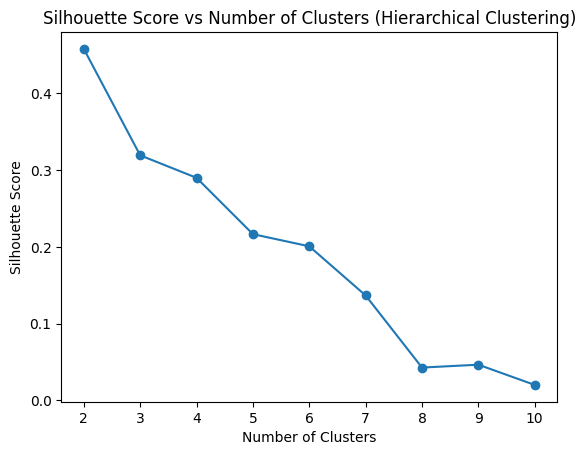

In [10]:
countries = df_ict_access['Country']
features = df_ict_access.drop('Country', axis=1)

imputer = SimpleImputer(strategy='median') # replace NaN with median value of the column 
features_imputed = imputer.fit_transform(features)

num_clusters_range = range(2, 11)
silhouette_scores = []

for num_clusters in num_clusters_range:
    agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = agglomerative.fit_predict(features_imputed)
    silhouette_avg = silhouette_score(features_imputed, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters (Hierarchical Clustering)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [11]:
best_num_clusters = 3

kmeans = KMeans(n_clusters=best_num_clusters, random_state=42, n_init =10)
df_ict_access['Cluster'] = kmeans.fit_predict(features_imputed)

df_ict_access['Country'] = countries

In [12]:
print(df_ict_access[['Country', 'Cluster']])

Indicator      Country  Cluster
0              Denmark        0
1              Finland        0
2               France        2
3              Germany        2
4                Italy        1
5                Japan        2
6                Korea        2
7          Netherlands        0
8               Norway        0
9               Sweden        0
10             Türkiye        1


Cluster 0: Denmark, Finland, Netherlands, Norway, Sweden

Cluster 1: Italy, Turkey

Cluster 2: France, Germany, Japan, Korea

### Cluster countries in groups with similar cultural interests

We will be able to see if the clusters retrieved as similar to the one retrieved just before

In [13]:
display(df_timeseries)

,pageviews,pageviews_per_page,language,date,topic,proportion,proportion_smooth,pdi,idv,mas,uai,ltowvs,ivr
0,1716611.0,11.517633,ja,2018-01-01,Culture.Biography.Biography*,0.219287,0.188152,54,46,95,92,88,42
1,1778375.0,11.932039,ja,2018-01-02,Culture.Biography.Biography*,0.203025,0.188145,54,46,95,92,88,42
2,2008370.0,13.475195,ja,2018-01-03,Culture.Biography.Biography*,0.200914,0.188141,54,46,95,92,88,42
3,2212806.0,14.846862,ja,2018-01-04,Culture.Biography.Biography*,0.184755,0.188139,54,46,95,92,88,42
4,2371514.0,15.911716,ja,2018-01-05,Culture.Biography.Biography*,0.186047,0.188140,54,46,95,92,88,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593665,15144565.0,6.290878,de.m,2020-07-27,ALL,1.000000,NaN,35,67,66,65,83,40
1593666,14183699.0,5.891745,de.m,2020-07-28,ALL,1.000000,NaN,35,67,66,65,83,40
1593667,13986935.0,5.810012,de.m,2020-07-29,ALL,1.000000,NaN,35,67,66,65,83,40
1593668,13483274.0,5.600797,de.m,2020-07-30,ALL,1.000000,NaN,35,67,66,65,83,40


In [55]:
# sum up the number of pageviews over the whole period for each topic
df_timeseries = df_timeseries[df_timeseries.topic != 'ALL'].groupby(["language", "topic"])["pageviews"].sum().reset_index()

# pivot the dataset to have topics as features and each row should represent a language
df_timeseries = df_timeseries.pivot(index='language', columns='topic', values='pageviews').reset_index()

df_timeseries['total_pageviews'] = df_timeseries.drop('language', axis=1).sum(axis=1)

display(df_timeseries) 

topic,language,Culture.Biography.Biography*,Culture.Biography.Women,Culture.Food and drink,Culture.Internet culture,Culture.Linguistics,Culture.Literature,Culture.Media.Books,Culture.Media.Entertainment,Culture.Media.Films,...,STEM.Earth and environment,STEM.Engineering,STEM.Libraries & Information,STEM.Mathematics,STEM.Medicine & Health,STEM.Physics,STEM.STEM*,STEM.Space,STEM.Technology,total_pageviews
0,ca,7.883991e+07,16405455.0,4075871.0,3057229.0,6250015.0,1.421344e+07,3382366.0,1589887.0,3824652.0,...,6424093.0,3071053.0,946921.0,2411308.0,10357333.0,6407572.0,6.329423e+07,3216289.0,10140000.0,6.978682e+08
1,ca.m,4.042055e+07,10633729.0,4906414.0,1299107.0,3473078.0,8.262838e+06,1781878.0,1409448.0,5783205.0,...,3244372.0,1614659.0,288632.0,1113379.0,7955846.0,3150849.0,3.591120e+07,1619658.0,3685306.0,4.056807e+08
2,da,6.439084e+07,14696793.0,5836114.0,4445336.0,5460801.0,1.507101e+07,3486995.0,2629005.0,7161256.0,...,5822741.0,5931928.0,672955.0,3802610.0,11528422.0,8404800.0,7.456435e+07,2777997.0,11073945.0,7.292371e+08
3,da.m,1.308458e+08,32888238.0,11756468.0,3484822.0,4471894.0,1.835293e+07,4462562.0,5874170.0,16773188.0,...,4599727.0,7736223.0,289548.0,1828919.0,13863285.0,3839308.0,7.017199e+07,2752614.0,8193908.0,1.081846e+09
4,de,2.117718e+09,498232746.0,180894382.0,192217261.0,133767707.0,3.528316e+08,91573982.0,132282945.0,452359733.0,...,129616721.0,402917188.0,16692230.0,131543958.0,506209286.0,211047989.0,2.812956e+09,76830666.0,576551009.0,2.524621e+10
5,de.m,3.477643e+09,975357228.0,362576551.0,188320416.0,130432171.0,5.174526e+08,129760124.0,252723324.0,806178496.0,...,126962400.0,425628025.0,9049690.0,67495416.0,760219089.0,140333690.0,2.776400e+09,79557093.0,391949175.0,3.312569e+10
6,fi,1.045438e+08,20101201.0,12216672.0,12473030.0,9030556.0,2.355188e+07,5964977.0,6243550.0,16971180.0,...,9622384.0,15125246.0,796132.0,6292529.0,29113403.0,13105634.0,1.517928e+08,5060800.0,26369947.0,1.329100e+09
7,fi.m,2.358488e+08,55301244.0,28283351.0,14978497.0,12111774.0,4.481817e+07,10822286.0,16177558.0,45626994.0,...,13155648.0,24837759.0,556839.0,4369380.0,63791519.0,13045929.0,2.407703e+08,7857520.0,27463865.0,2.442870e+09
8,fr,1.858267e+09,435152112.0,111604157.0,164952318.0,86943729.0,4.537761e+08,105284797.0,110617774.0,418211428.0,...,89090047.0,165924566.0,12501989.0,79656767.0,277445800.0,124102875.0,1.532050e+09,56773726.0,347902436.0,1.867854e+10
9,fr.m,3.568558e+09,956275535.0,254937941.0,157202625.0,108481488.0,6.704954e+08,147422890.0,204100814.0,660975264.0,...,103737218.0,215635738.0,8707531.0,61028543.0,514046319.0,117768705.0,1.852205e+09,66450302.0,263905073.0,2.895546e+10


In [15]:
nan_check = df_timeseries.isna().any()

print("Columns with NaN values:")
print(nan_check[nan_check].index.tolist())

Columns with NaN values:
[]


In [56]:
# Normalize by dividing each cell by the total number of pageviews for this language (all topics included)
for topic in df_timeseries.columns[1:]: 
    df_timeseries[topic] = df_timeseries[topic] / df_timeseries['total_pageviews']

df_timeseries = df_timeseries.drop('total_pageviews', axis=1)

display(df_timeseries)

topic,language,Culture.Biography.Biography*,Culture.Biography.Women,Culture.Food and drink,Culture.Internet culture,Culture.Linguistics,Culture.Literature,Culture.Media.Books,Culture.Media.Entertainment,Culture.Media.Films,...,STEM.Computing,STEM.Earth and environment,STEM.Engineering,STEM.Libraries & Information,STEM.Mathematics,STEM.Medicine & Health,STEM.Physics,STEM.STEM*,STEM.Space,STEM.Technology
0,ca,0.112972,0.023508,0.005840,0.004381,0.008956,0.020367,0.004847,0.002278,0.005480,...,0.007894,0.009205,0.004401,0.001357,0.003455,0.014841,0.009182,0.090697,0.004609,0.014530
1,ca.m,0.099636,0.026212,0.012094,0.003202,0.008561,0.020368,0.004392,0.003474,0.014256,...,0.002918,0.007997,0.003980,0.000711,0.002744,0.019611,0.007767,0.088521,0.003992,0.009084
2,da,0.088299,0.020154,0.008003,0.006096,0.007488,0.020667,0.004782,0.003605,0.009820,...,0.007266,0.007985,0.008134,0.000923,0.005215,0.015809,0.011525,0.102250,0.003809,0.015186
3,da.m,0.120947,0.030400,0.010867,0.003221,0.004134,0.016964,0.004125,0.005430,0.015504,...,0.002063,0.004252,0.007151,0.000268,0.001691,0.012814,0.003549,0.064863,0.002544,0.007574
4,de,0.083883,0.019735,0.007165,0.007614,0.005299,0.013976,0.003627,0.005240,0.017918,...,0.013647,0.005134,0.015960,0.000661,0.005210,0.020051,0.008360,0.111421,0.003043,0.022837
5,de.m,0.104983,0.029444,0.010945,0.005685,0.003937,0.015621,0.003917,0.007629,0.024337,...,0.003562,0.003833,0.012849,0.000273,0.002038,0.022950,0.004236,0.083814,0.002402,0.011832
6,fi,0.078658,0.015124,0.009192,0.009385,0.006794,0.017720,0.004488,0.004698,0.012769,...,0.009288,0.007240,0.011380,0.000599,0.004734,0.021905,0.009861,0.114207,0.003808,0.019840
7,fi.m,0.096546,0.022638,0.011578,0.006132,0.004958,0.018347,0.004430,0.006622,0.018678,...,0.002860,0.005385,0.010167,0.000228,0.001789,0.026113,0.005340,0.098560,0.003217,0.011242
8,fr,0.099487,0.023297,0.005975,0.008831,0.004655,0.024294,0.005637,0.005922,0.022390,...,0.010770,0.004770,0.008883,0.000669,0.004265,0.014854,0.006644,0.082022,0.003040,0.018626
9,fr.m,0.123243,0.033026,0.008804,0.005429,0.003746,0.023156,0.005091,0.007049,0.022827,...,0.003223,0.003583,0.007447,0.000301,0.002108,0.017753,0.004067,0.063967,0.002295,0.009114


In [57]:
# Merge mobile and pc rows 

df_timeseries_combined = df_timeseries.copy()

df_timeseries_combined['language'] = df_timeseries_combined['language'].str[:2]

df_timeseries_combined = df_timeseries_combined.groupby(['language'], as_index=False).agg({
    **{topic: 'sum' for topic in df_timeseries_combined.columns if topic not in ['language']},
})

#df_timeseries_combined.drop('language', axis=1, inplace=True)

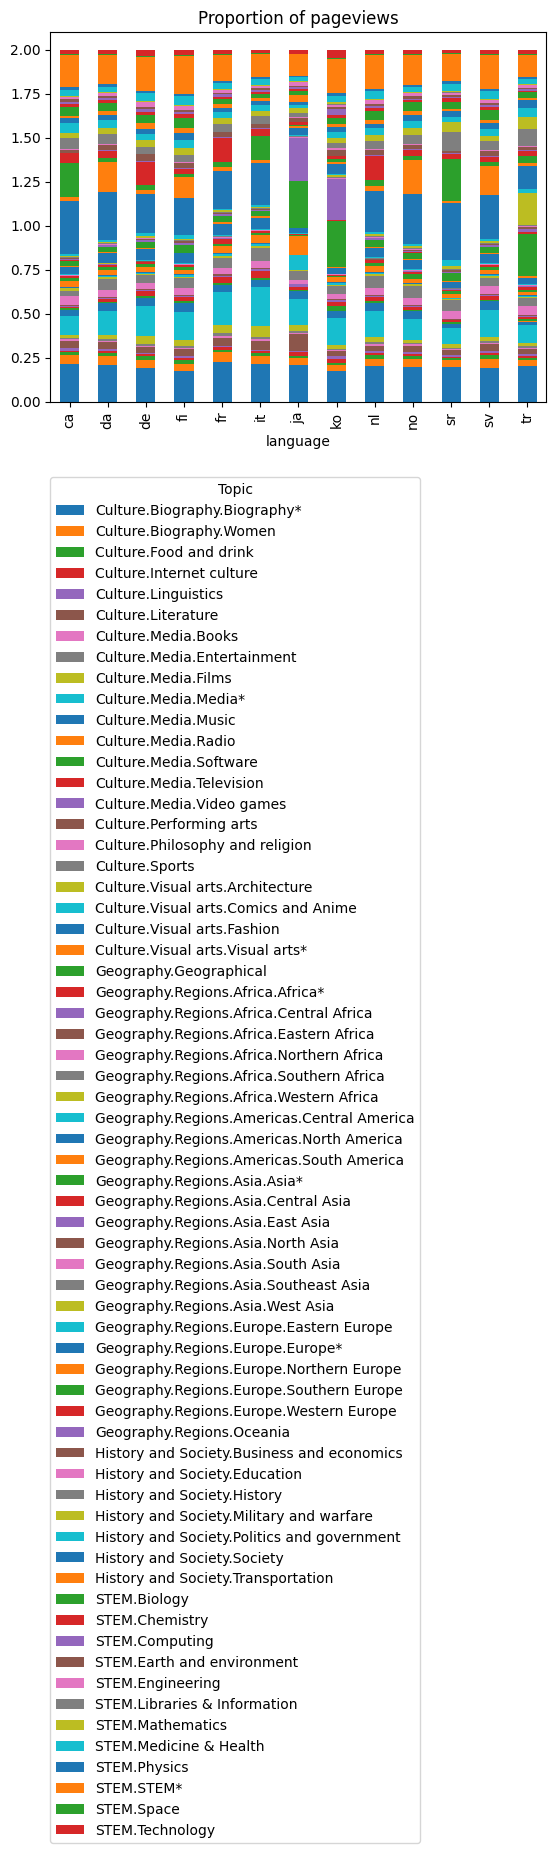

In [58]:
df_timeseries_combined.plot.bar(x='language', stacked=True, title='Proportion of pageviews')
plt.legend(title='Topic', loc=(0,-3.9))

In [61]:
def map_df(df):
    topic_mapping = {
        'STEM': ['STEM.Biology', 'STEM.Chemistry', 'STEM.Computing', 'STEM.Earth and environment',
                'STEM.Engineering', 'STEM.Libraries & Information', 'STEM.Mathematics',
                'STEM.Medicine & Health', 'STEM.Physics', 'STEM.STEM*', 'STEM.Space', 'STEM.Technology'],
        'History and Society': ['History and Society.Business and economics', 'History and Society.Education',
                                'History and Society.History', 'History and Society.Military and warfare',
                                'History and Society.Politics and government', 'History and Society.Society',
                                'History and Society.Transportation'],
        'Geography': ['Geography.Geographical', 'Geography.Regions.Africa.Africa*',
                    'Geography.Regions.Africa.Central Africa', 'Geography.Regions.Africa.Eastern Africa',
                    'Geography.Regions.Africa.Northern Africa', 'Geography.Regions.Africa.Southern Africa',
                    'Geography.Regions.Africa.Western Africa', 'Geography.Regions.Americas.Central America',
                    'Geography.Regions.Americas.North America', 'Geography.Regions.Americas.South America',
                    'Geography.Regions.Asia.Asia*', 'Geography.Regions.Asia.Central Asia',
                    'Geography.Regions.Asia.East Asia', 'Geography.Regions.Asia.North Asia',
                    'Geography.Regions.Asia.South Asia', 'Geography.Regions.Asia.Southeast Asia',
                    'Geography.Regions.Asia.West Asia', 'Geography.Regions.Europe.Eastern Europe',
                    'Geography.Regions.Europe.Europe*', 'Geography.Regions.Europe.Northern Europe',
                    'Geography.Regions.Europe.Southern Europe', 'Geography.Regions.Europe.Western Europe',
                    'Geography.Regions.Oceania'],
        'Culture': ['Culture.Biography.Biography*', 'Culture.Biography.Women', 'Culture.Food and drink',
                    'Culture.Internet culture', 'Culture.Linguistics', 'Culture.Literature', 'Culture.Media.Books',
                    'Culture.Media.Entertainment', 'Culture.Media.Films', 'Culture.Media.Media*', 'Culture.Media.Music',
                    'Culture.Media.Radio', 'Culture.Media.Software', 'Culture.Media.Television', 'Culture.Media.Video games',
                    'Culture.Performing arts', 'Culture.Philosophy and religion', 'Culture.Sports',
                    'Culture.Visual arts.Architecture', 'Culture.Visual arts.Comics and Anime', 'Culture.Visual arts.Fashion',
                    'Culture.Visual arts.Visual arts*']
    }

    mapped_timeseries_df = pd.DataFrame(columns=['STEM', 'History and Society', 'Geography', 'Culture'])
    for category, sub_topics in topic_mapping.items():
        mapped_timeseries_df[category] = df[sub_topics].sum(axis=1)
    mapped_timeseries_df['language'] = df['language']

    mapped_timeseries_df.plot.bar(x='language', stacked=True, title='Proportion of pageviews')
    plt.legend(title='Topic', loc=(0,-0.5))

    return mapped_timeseries_df

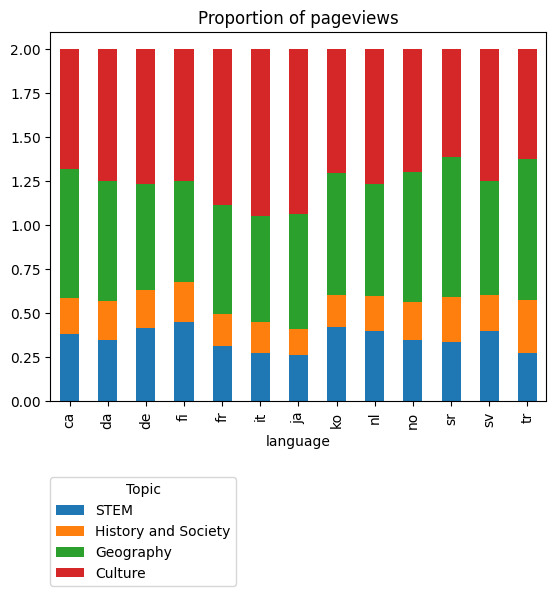

In [62]:
mapped_timeseries_combined_df = map_df(df_timeseries_combined)

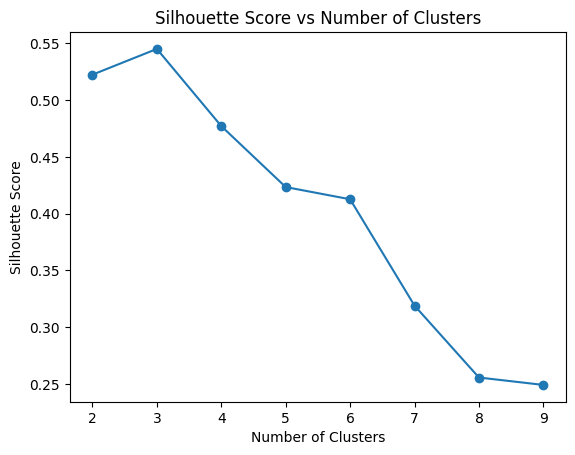

In [63]:
countries = mapped_timeseries_combined_df['language']
features = mapped_timeseries_combined_df.drop('language', axis=1)

imputer = SimpleImputer(strategy='median')
features_imputed = imputer.fit_transform(features)

num_clusters_range = range(2, 10)
silhouette_scores = []

for num_clusters in num_clusters_range:
    agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = agglomerative.fit_predict(features_imputed)
    silhouette_avg = silhouette_score(features_imputed, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(num_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [64]:
best_num_clusters = 3

kmeans = KMeans(n_clusters=best_num_clusters, random_state=42, n_init =10)
mapped_timeseries_combined_df['Cluster'] = kmeans.fit_predict(features_imputed)

mapped_timeseries_combined_df['language'] = countries

In [65]:
print(mapped_timeseries_combined_df[['language', 'Cluster']])

   language  Cluster
0        ca        1
1        da        0
2        de        0
3        fi        0
4        fr        2
5        it        2
6        ja        2
7        ko        0
8        nl        0
9        no        1
10       sr        1
11       sv        0
12       tr        1


Cluster 0: Serbia (we didn't have data concerning ICT usage for Serbia) 

Cluster 1: Turkey

Cluster 2: Denmark, Finland, Korea, Norway

CLuster 3: Japan

Cluster 4: Catalan, Germany, France, Italy, Netherlands, Sweden

I also tried before to cluster before mapping columns to more general categories and the best Silhouette score was obtained with only one cluster -> so it tried to reduce the number of features to reduce the chance of overfitting 

### Summary 

#### Cluster ICT 

| Cluster | Countries                              |
|---------|----------------------------------------|
| 0       | Denmark, Finland, Netherlands, Norway, Sweden |
| 1       | Italy, Turkey                           |
| 2       | France, Germany, Japan, Korea           |

#### Clusters timeseries

| Cluster | Countries                                      |
|---------|------------------------------------------------|
| 0       | Serbia (no data on ICT usage)                  |
| 1       | Turkey                                         |
| 2       | Denmark, Finland, Korea, Norway                |
| 3       | Japan                                          |
| 4       | Catalan, Germany, France, Italy, Netherlands, Sweden |

### Compare pageviews statistics for Mobile VS Desktop 

For some topics, we compare the pageviews between mobile and desktop data for each country.

Plot an histogram that compares their pageviews across all countries for a specific topic  

In [66]:
df_timeseries.head()

topic,language,Culture.Biography.Biography*,Culture.Biography.Women,Culture.Food and drink,Culture.Internet culture,Culture.Linguistics,Culture.Literature,Culture.Media.Books,Culture.Media.Entertainment,Culture.Media.Films,...,STEM.Computing,STEM.Earth and environment,STEM.Engineering,STEM.Libraries & Information,STEM.Mathematics,STEM.Medicine & Health,STEM.Physics,STEM.STEM*,STEM.Space,STEM.Technology
0,ca,0.112972,0.023508,0.005840,0.004381,0.008956,0.020367,0.004847,0.002278,0.005480,...,0.007894,0.009205,0.004401,0.001357,0.003455,0.014841,0.009182,0.090697,0.004609,0.014530
1,ca.m,0.099636,0.026212,0.012094,0.003202,0.008561,0.020368,0.004392,0.003474,0.014256,...,0.002918,0.007997,0.003980,0.000711,0.002744,0.019611,0.007767,0.088521,0.003992,0.009084
2,da,0.088299,0.020154,0.008003,0.006096,0.007488,0.020667,0.004782,0.003605,0.009820,...,0.007266,0.007985,0.008134,0.000923,0.005215,0.015809,0.011525,0.102250,0.003809,0.015186
3,da.m,0.120947,0.030400,0.010867,0.003221,0.004134,0.016964,0.004125,0.005430,0.015504,...,0.002063,0.004252,0.007151,0.000268,0.001691,0.012814,0.003549,0.064863,0.002544,0.007574
4,de,0.083883,0.019735,0.007165,0.007614,0.005299,0.013976,0.003627,0.005240,0.017918,...,0.013647,0.005134,0.015960,0.000661,0.005210,0.020051,0.008360,0.111421,0.003043,0.022837


In [67]:
# Add a column mobile (1 if mobile, 0 if desktop)

test = df_timeseries.copy()

df_timeseries['mobile'] = df_timeseries['language'].apply(lambda x: 1 if x[-2:] == '.m' else 0)
df_timeseries['language'] = df_timeseries['language'].apply(lambda x: x[:-2] if x[-2:] == '.m' else x)

df_timeseries.head()

topic,language,Culture.Biography.Biography*,Culture.Biography.Women,Culture.Food and drink,Culture.Internet culture,Culture.Linguistics,Culture.Literature,Culture.Media.Books,Culture.Media.Entertainment,Culture.Media.Films,...,STEM.Earth and environment,STEM.Engineering,STEM.Libraries & Information,STEM.Mathematics,STEM.Medicine & Health,STEM.Physics,STEM.STEM*,STEM.Space,STEM.Technology,mobile
0,ca,0.112972,0.023508,0.005840,0.004381,0.008956,0.020367,0.004847,0.002278,0.005480,...,0.009205,0.004401,0.001357,0.003455,0.014841,0.009182,0.090697,0.004609,0.014530,0
1,ca,0.099636,0.026212,0.012094,0.003202,0.008561,0.020368,0.004392,0.003474,0.014256,...,0.007997,0.003980,0.000711,0.002744,0.019611,0.007767,0.088521,0.003992,0.009084,1
2,da,0.088299,0.020154,0.008003,0.006096,0.007488,0.020667,0.004782,0.003605,0.009820,...,0.007985,0.008134,0.000923,0.005215,0.015809,0.011525,0.102250,0.003809,0.015186,0
3,da,0.120947,0.030400,0.010867,0.003221,0.004134,0.016964,0.004125,0.005430,0.015504,...,0.004252,0.007151,0.000268,0.001691,0.012814,0.003549,0.064863,0.002544,0.007574,1
4,de,0.083883,0.019735,0.007165,0.007614,0.005299,0.013976,0.003627,0.005240,0.017918,...,0.005134,0.015960,0.000661,0.005210,0.020051,0.008360,0.111421,0.003043,0.022837,0


In [68]:
def plot_mobile_vs_desktop(df, topic):

    mobile_df_1 = df[df['mobile'] == 1]
    mobile_df_0 = df[df['mobile'] == 0]

    x_values_1 = np.arange(len(mobile_df_1['language']))
    x_values_0 = np.arange(len(mobile_df_0['language'])) + 0.4  # Shift the x-coordinates for mobile = 0

    # Plot side-by-side bar charts for both conditions on the same plot
    plt.figure(figsize=(12, 6))

    plt.bar(x_values_1, mobile_df_1[topic], width=0.4, label='Mobile', alpha=0.7)
    plt.bar(x_values_0, mobile_df_0[topic], width=0.4, label='Desktop', alpha=0.7)

    # Set x-axis ticks and labels
    plt.xticks((x_values_1 + x_values_0) / 2, mobile_df_1['language'])

    plt.title(f'Compare pageviews between desktop and mobile for {topic}')
    plt.xlabel('Language')
    plt.ylabel(f'{topic} pageviews')

    plt.legend()  # Display legend to distinguish between Mobile = 1 and Mobile = 0

    plt.show()

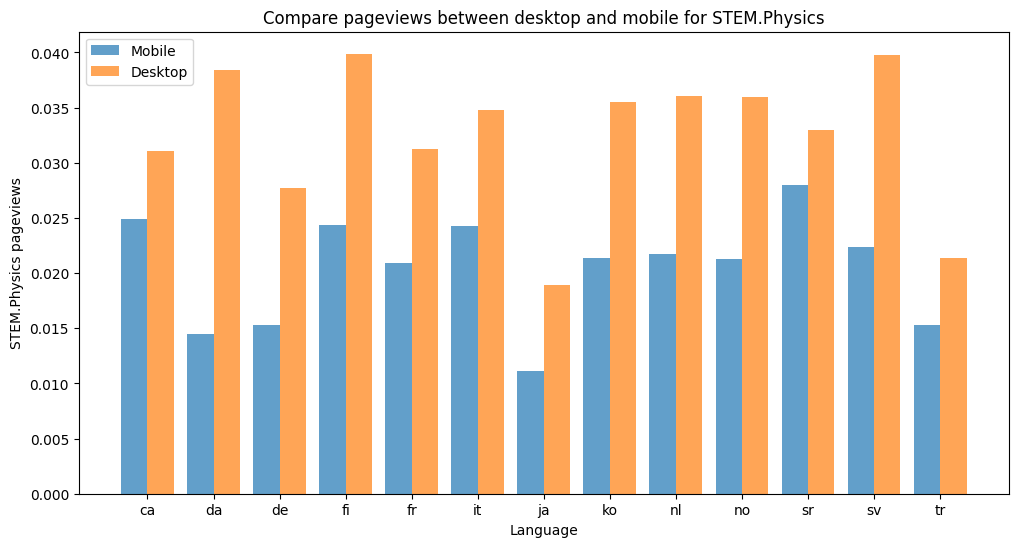

In [29]:
plot_mobile_vs_desktop(df_timeseries, 'STEM.Physics')

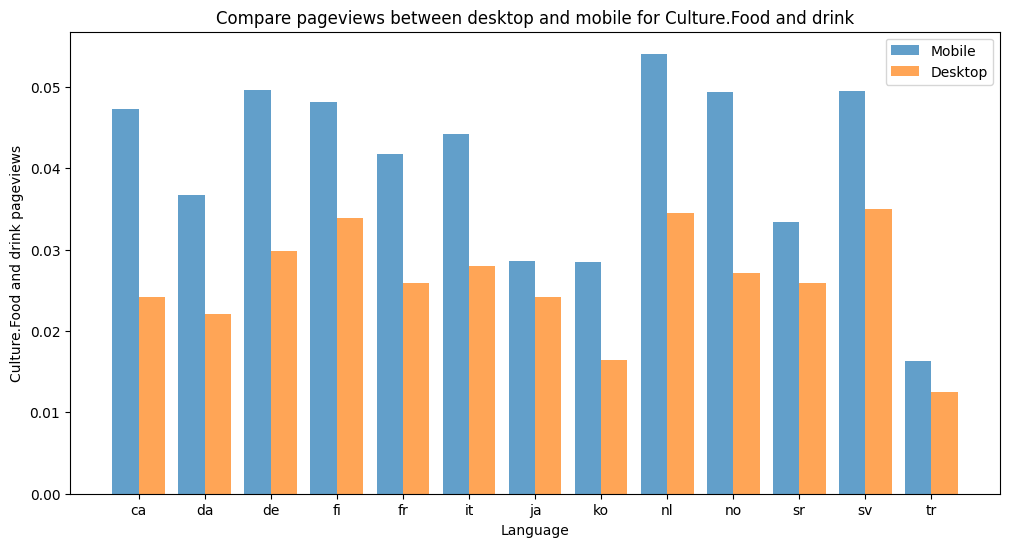

In [30]:
plot_mobile_vs_desktop(df_timeseries, 'Culture.Food and drink')

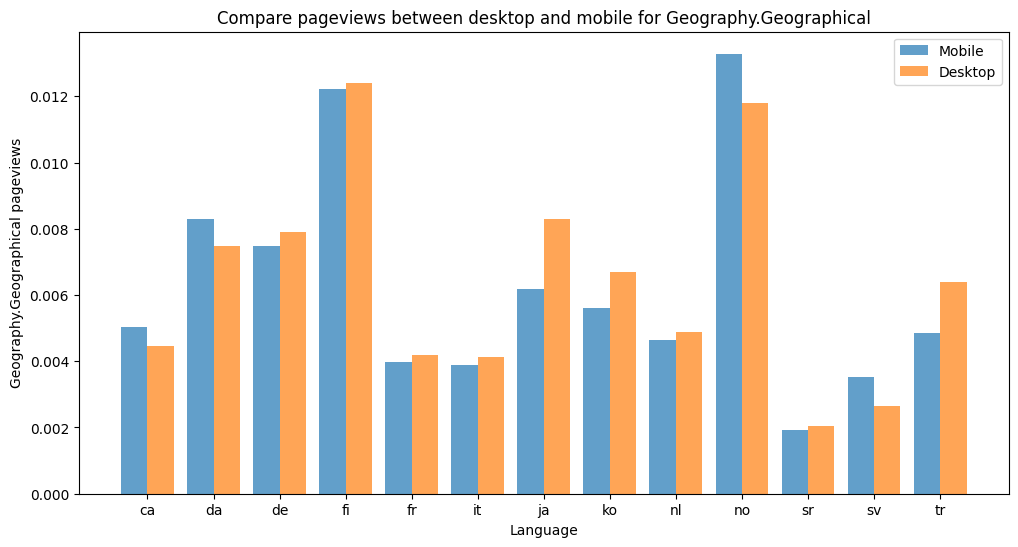

In [31]:
plot_mobile_vs_desktop(df_timeseries, 'Geography.Geographical')

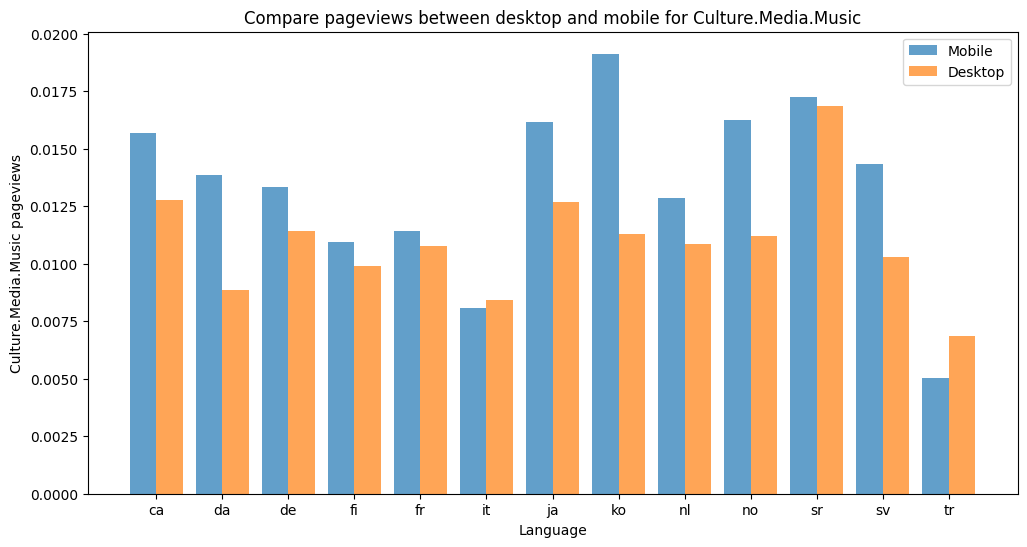

In [32]:
plot_mobile_vs_desktop(df_timeseries, 'Culture.Media.Music')

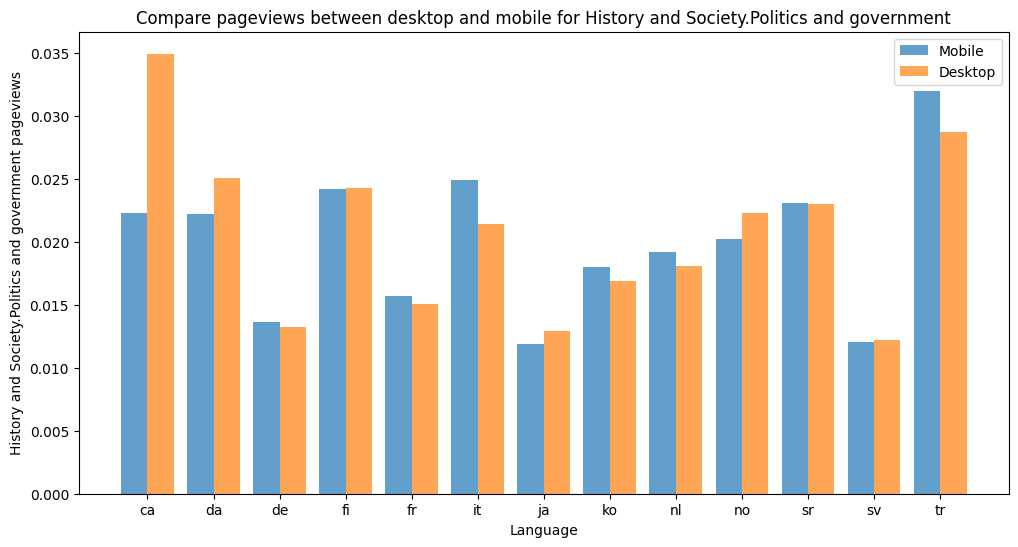

In [33]:
plot_mobile_vs_desktop(df_timeseries, 'History and Society.Politics and government')

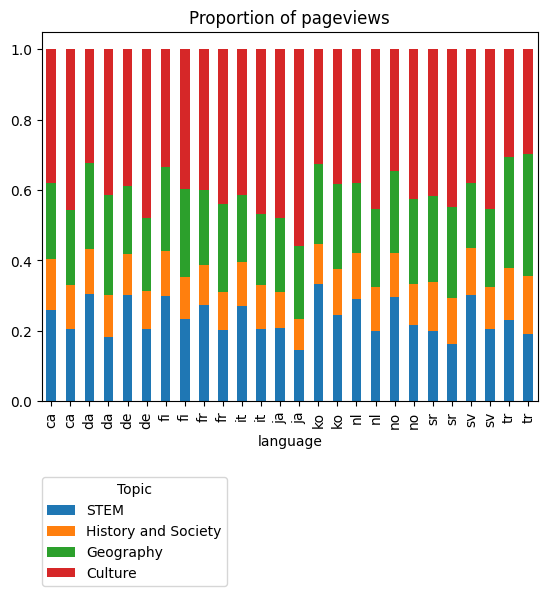

In [34]:
    topic_mapping = {
        'STEM': ['STEM.Biology', 'STEM.Chemistry', 'STEM.Computing', 'STEM.Earth and environment',
                'STEM.Engineering', 'STEM.Libraries & Information', 'STEM.Mathematics',
                'STEM.Medicine & Health', 'STEM.Physics', 'STEM.STEM*', 'STEM.Space', 'STEM.Technology'],
        'History and Society': ['History and Society.Business and economics', 'History and Society.Education',
                                'History and Society.History', 'History and Society.Military and warfare',
                                'History and Society.Politics and government', 'History and Society.Society',
                                'History and Society.Transportation'],
        'Geography': ['Geography.Geographical', 'Geography.Regions.Africa.Africa*',
                    'Geography.Regions.Africa.Central Africa', 'Geography.Regions.Africa.Eastern Africa',
                    'Geography.Regions.Africa.Northern Africa', 'Geography.Regions.Africa.Southern Africa',
                    'Geography.Regions.Africa.Western Africa', 'Geography.Regions.Americas.Central America',
                    'Geography.Regions.Americas.North America', 'Geography.Regions.Americas.South America',
                    'Geography.Regions.Asia.Asia*', 'Geography.Regions.Asia.Central Asia',
                    'Geography.Regions.Asia.East Asia', 'Geography.Regions.Asia.North Asia',
                    'Geography.Regions.Asia.South Asia', 'Geography.Regions.Asia.Southeast Asia',
                    'Geography.Regions.Asia.West Asia', 'Geography.Regions.Europe.Eastern Europe',
                    'Geography.Regions.Europe.Europe*', 'Geography.Regions.Europe.Northern Europe',
                    'Geography.Regions.Europe.Southern Europe', 'Geography.Regions.Europe.Western Europe',
                    'Geography.Regions.Oceania'],
        'Culture': ['Culture.Biography.Biography*', 'Culture.Biography.Women', 'Culture.Food and drink',
                    'Culture.Internet culture', 'Culture.Linguistics', 'Culture.Literature', 'Culture.Media.Books',
                    'Culture.Media.Entertainment', 'Culture.Media.Films', 'Culture.Media.Media*', 'Culture.Media.Music',
                    'Culture.Media.Radio', 'Culture.Media.Software', 'Culture.Media.Television', 'Culture.Media.Video games',
                    'Culture.Performing arts', 'Culture.Philosophy and religion', 'Culture.Sports',
                    'Culture.Visual arts.Architecture', 'Culture.Visual arts.Comics and Anime', 'Culture.Visual arts.Fashion',
                    'Culture.Visual arts.Visual arts*']
    }

    mapped_timeseries_df = pd.DataFrame(columns=['STEM', 'History and Society', 'Geography', 'Culture'])
    for category, sub_topics in topic_mapping.items():
        mapped_timeseries_df[category] = df_timeseries[sub_topics].sum(axis=1)
    mapped_timeseries_df['language'] = df_timeseries['language']

    mapped_timeseries_df.plot.bar(x='language', stacked=True, title='Proportion of pageviews')
    plt.legend(title='Topic', loc=(0,-0.5))

In [35]:
mapped_timeseries_df['mobile'] = df_timeseries['mobile']
display(mapped_timeseries_df)

,STEM,History and Society,Geography,Culture,language,mobile
0,0.258513,0.146317,0.215338,0.379831,ca,0
1,0.205736,0.124366,0.213930,0.455967,ca,1
2,0.303746,0.128149,0.245100,0.323004,da,0
3,0.182563,0.117932,0.285400,0.414105,da,1
4,0.302748,0.114490,0.194688,0.388074,de,0
5,0.206110,0.108036,0.206344,0.479510,de,1
6,0.299793,0.126722,0.237890,0.335595,fi,0
7,0.234165,0.120026,0.248710,0.397099,fi,1
8,0.272365,0.114406,0.213655,0.399574,fr,0
9,0.201725,0.109134,0.248380,0.440761,fr,1


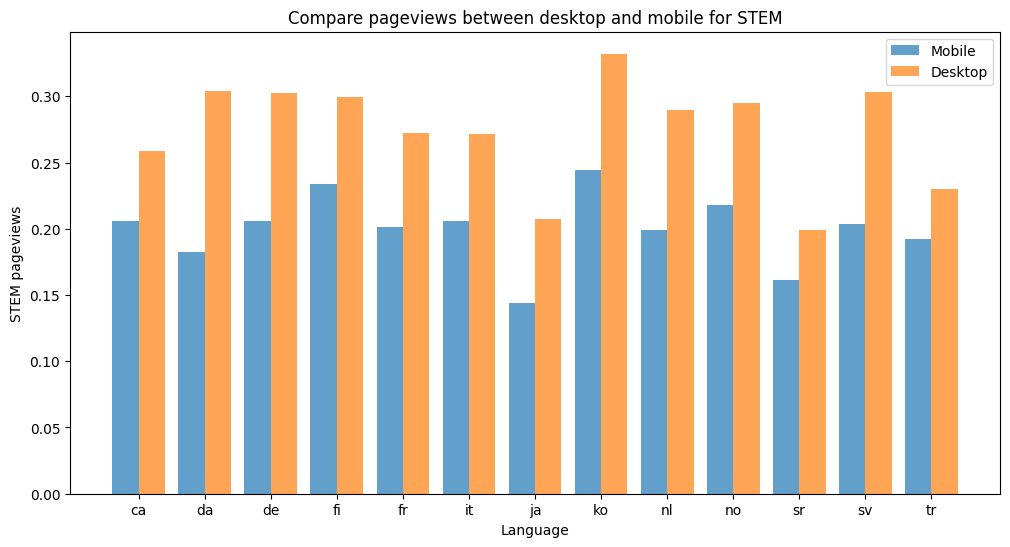

In [36]:
plot_mobile_vs_desktop(mapped_timeseries_df, 'STEM')

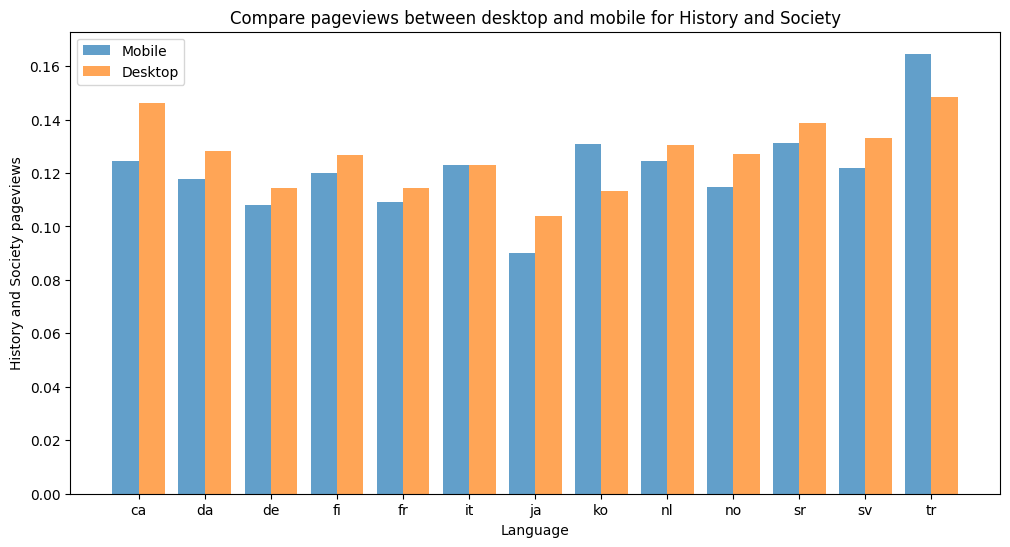

In [37]:
plot_mobile_vs_desktop(mapped_timeseries_df, 'History and Society')

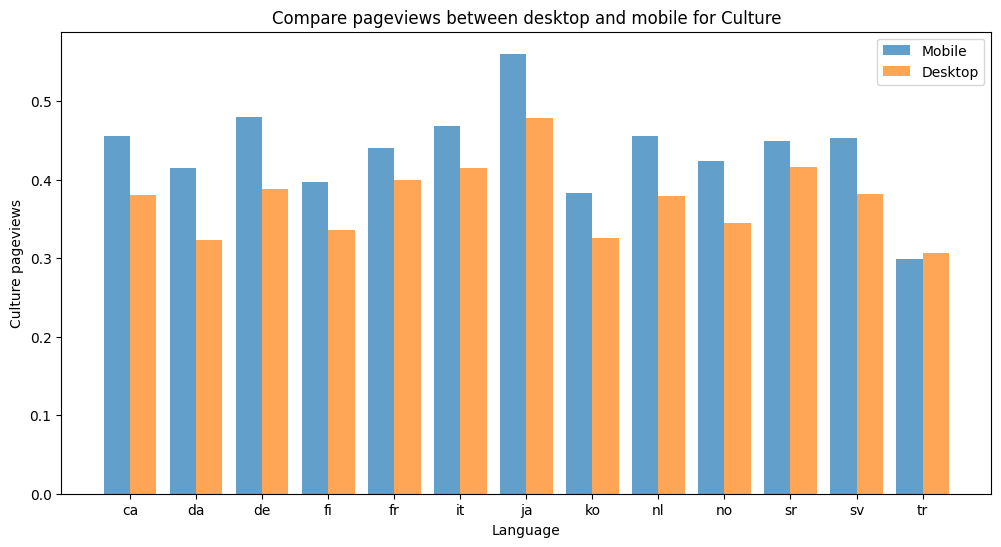

In [38]:
plot_mobile_vs_desktop(mapped_timeseries_df, 'Culture')

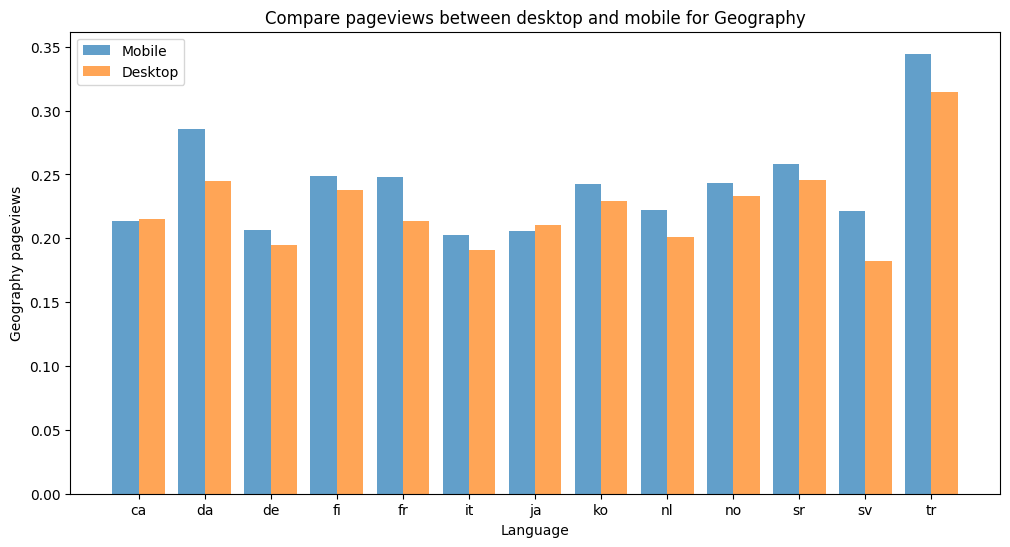

In [39]:
plot_mobile_vs_desktop(mapped_timeseries_df, 'Geography')

### Perform ANOVA on the pageviews for mobile and desktop

In [49]:
df_anova = pd.read_csv('data/df_timeseries.csv')

In [50]:
display(df_anova)

,pageviews,pageviews_per_page,language,date,topic,proportion,proportion_smooth,pdi,idv,mas,uai,ltowvs,ivr
0,1716611.0,11.517633,ja,2018-01-01,Culture.Biography.Biography*,0.219287,0.188152,54,46,95,92,88,42
1,1778375.0,11.932039,ja,2018-01-02,Culture.Biography.Biography*,0.203025,0.188145,54,46,95,92,88,42
2,2008370.0,13.475195,ja,2018-01-03,Culture.Biography.Biography*,0.200914,0.188141,54,46,95,92,88,42
3,2212806.0,14.846862,ja,2018-01-04,Culture.Biography.Biography*,0.184755,0.188139,54,46,95,92,88,42
4,2371514.0,15.911716,ja,2018-01-05,Culture.Biography.Biography*,0.186047,0.188140,54,46,95,92,88,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593665,15144565.0,6.290878,de.m,2020-07-27,ALL,1.000000,NaN,35,67,66,65,83,40
1593666,14183699.0,5.891745,de.m,2020-07-28,ALL,1.000000,NaN,35,67,66,65,83,40
1593667,13986935.0,5.810012,de.m,2020-07-29,ALL,1.000000,NaN,35,67,66,65,83,40
1593668,13483274.0,5.600797,de.m,2020-07-30,ALL,1.000000,NaN,35,67,66,65,83,40


In [51]:
# Normalize pageviews_per_page by dividing by the the number of pageviews for a specific day and a specific topic by all the total number of pageviews this day all topics combined
df_anova['pageviews_norm'] = df_anova.groupby(['date', 'language'])['pageviews_per_page'].transform(lambda x: x/ x.sum()) 

df_anova = df_anova[df_anova['topic'] != 'ALL']

df_anova = df_anova[['language', 'date', 'topic', 'pageviews_norm']]

# Add a column mobile (1 if mobile, 0 if desktop)
df_anova['mobile'] = df_anova['language'].apply(lambda x: 1 if x[-2:] == '.m' else 0)
df_anova['lang'] = df_anova['language'].apply(lambda x: x[:-2] if x[-2:] == '.m' else x)

display(df_anova)

,language,date,topic,pageviews_norm,mobile,lang
0,ja,2018-01-01,Culture.Biography.Biography*,0.017426,0,ja
1,ja,2018-01-02,Culture.Biography.Biography*,0.016001,0,ja
2,ja,2018-01-03,Culture.Biography.Biography*,0.015715,0,ja
3,ja,2018-01-04,Culture.Biography.Biography*,0.014338,0,ja
4,ja,2018-01-05,Culture.Biography.Biography*,0.014520,0,ja
...,...,...,...,...,...,...
1592722,de.m,2020-07-27,STEM.Technology,0.019914,1,de
1592723,de.m,2020-07-28,STEM.Technology,0.021485,1,de
1592724,de.m,2020-07-29,STEM.Technology,0.022255,1,de
1592725,de.m,2020-07-30,STEM.Technology,0.023183,1,de


In [52]:
path = 'data/'

df_anova.to_csv(path + 'df_timeseries_prepro.csv' , index=False)

Function to plot one-way ANOVA to understand whether there exists a statistically significant difference in the pageviews_norm for a same language, same topic but different mobile value. 

In [43]:
def one_way_anova(df, topic, language):
    subset_df = df[(df['topic'] == topic) & (df['language'] == language)]

    mobile_groups = [group[1]['pageviews_norm'].values for group in subset_df.groupby('mobile')]
    
    statistic, p_value = f_oneway(*mobile_groups)
    
    print(f"One-way ANOVA results for {topic}, {language}:")
    print(f"   F-statistic: {statistic}")
    print(f"   P-value: {p_value}")
    
    if p_value < 0.05:
        print("   The difference in pageviews_norm is statistically significant.")
    else:
        print("   There is no statistically significant difference in pageviews_norm.")


In [44]:
one_way_anova(df_anova, 'Culture.Food and drink', 'no')

One-way ANOVA results for Culture.Food and drink, no:
   F-statistic: 5700.687054223291
   P-value: 0.0
   The difference in pageviews_norm is statistically significant.


In [45]:
one_way_anova(df_anova, 'STEM.Physics', 'tr')

One-way ANOVA results for STEM.Physics, tr:
   F-statistic: 998.4994558079027
   P-value: 3.293875797782759e-176
   The difference in pageviews_norm is statistically significant.


In [46]:
one_way_anova(df_anova, 'STEM.Physics', 'fr')

One-way ANOVA results for STEM.Physics, fr:
   F-statistic: 1738.7411994034394
   P-value: 8.64080564289745e-270
   The difference in pageviews_norm is statistically significant.


In [47]:
one_way_anova(df_anova, 'Geography.Geographical', 'fi')

One-way ANOVA results for Geography.Geographical, fi:
   F-statistic: 9.39660133602417
   P-value: 0.002204741396502445
   The difference in pageviews_norm is statistically significant.
